# **Load data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/sustainable-fashion-eco-friendly-trends/sustainable_fashion_trends_2024.csv")
print(df.info())
print(df.isnull().sum())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [2]:
df['Certifications'].fillna('None', inplace=True)
print(df.isnull().sum())

Brand_ID                      0
Brand_Name                    0
Country                       0
Year                          0
Sustainability_Rating         0
Material_Type                 0
Eco_Friendly_Manufacturing    0
Carbon_Footprint_MT           0
Water_Usage_Liters            0
Waste_Production_KG           0
Recycling_Programs            0
Product_Lines                 0
Average_Price_USD             0
Market_Trend                  0
Certifications                0
dtype: int64


              Year  Carbon_Footprint_MT  Water_Usage_Liters  \
count  5000.000000          5000.000000        5.000000e+03   
mean   2016.956200           250.317550        2.517862e+06   
std       4.347466           142.802345        1.429043e+06   
min    2010.000000             1.040000        5.010618e+04   
25%    2013.000000           126.615000        1.293087e+06   
50%    2017.000000           250.650000        2.499096e+06   
75%    2021.000000           372.255000        3.763860e+06   
max    2024.000000           499.930000        4.999597e+06   

       Waste_Production_KG  Product_Lines  Average_Price_USD  
count          5000.000000    5000.000000        5000.000000  
mean          50107.304048      10.431200         259.354216  
std           28746.381115       5.706573         137.730976  
min            1026.380000       1.000000          20.020000  
25%           25340.802500       5.000000         142.865000  
50%           50466.340000      10.000000         258.

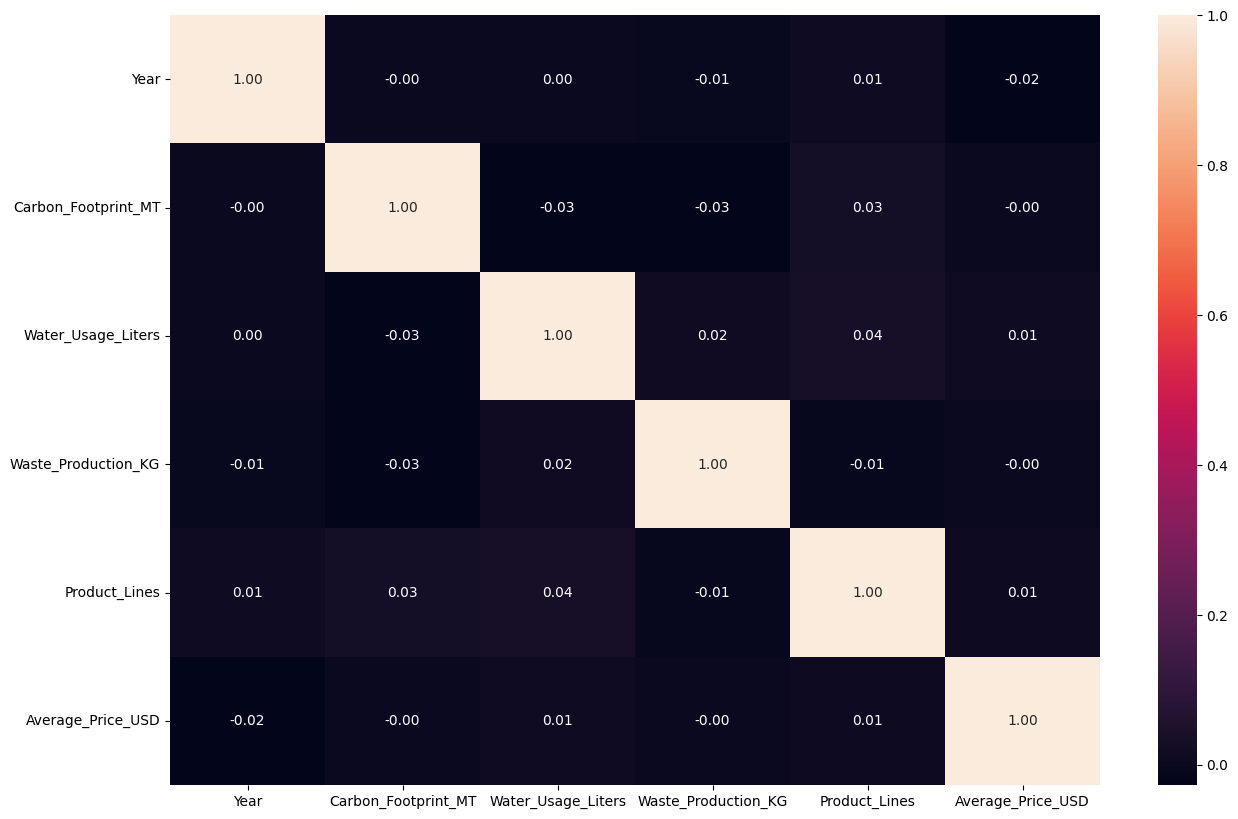

In [3]:

print(df.describe())

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()


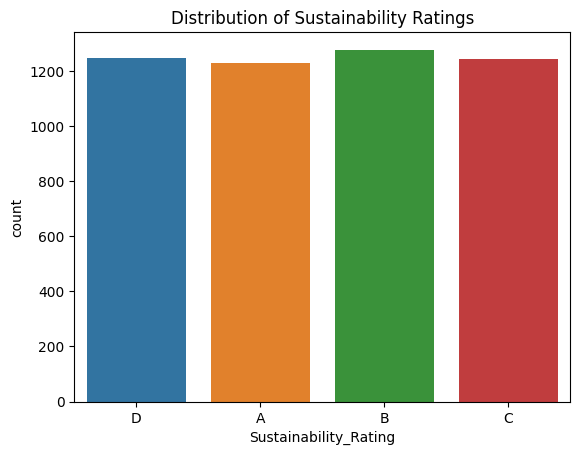

In [4]:
sns.countplot(data=df, x="Sustainability_Rating")
plt.title('Distribution of Sustainability Ratings')
plt.show()

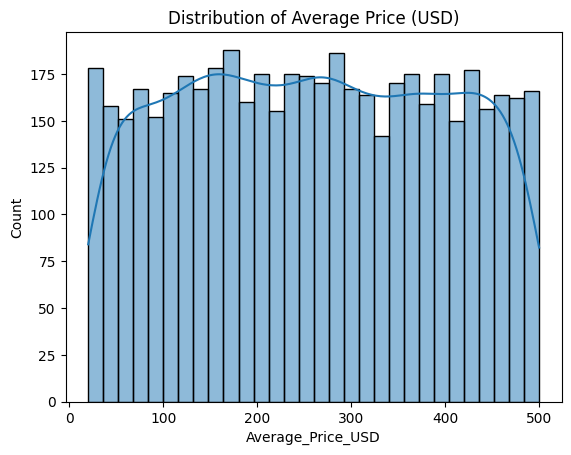

In [5]:
sns.histplot(df['Average_Price_USD'], bins=30, kde=True)
plt.title('Distribution of Average Price (USD)')
plt.show()

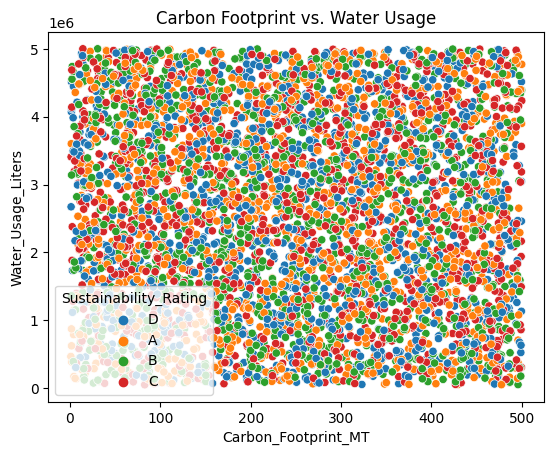

In [6]:
sns.scatterplot(data=df, x='Carbon_Footprint_MT', y='Water_Usage_Liters', hue='Sustainability_Rating')
plt.title('Carbon Footprint vs. Water Usage')
plt.show()


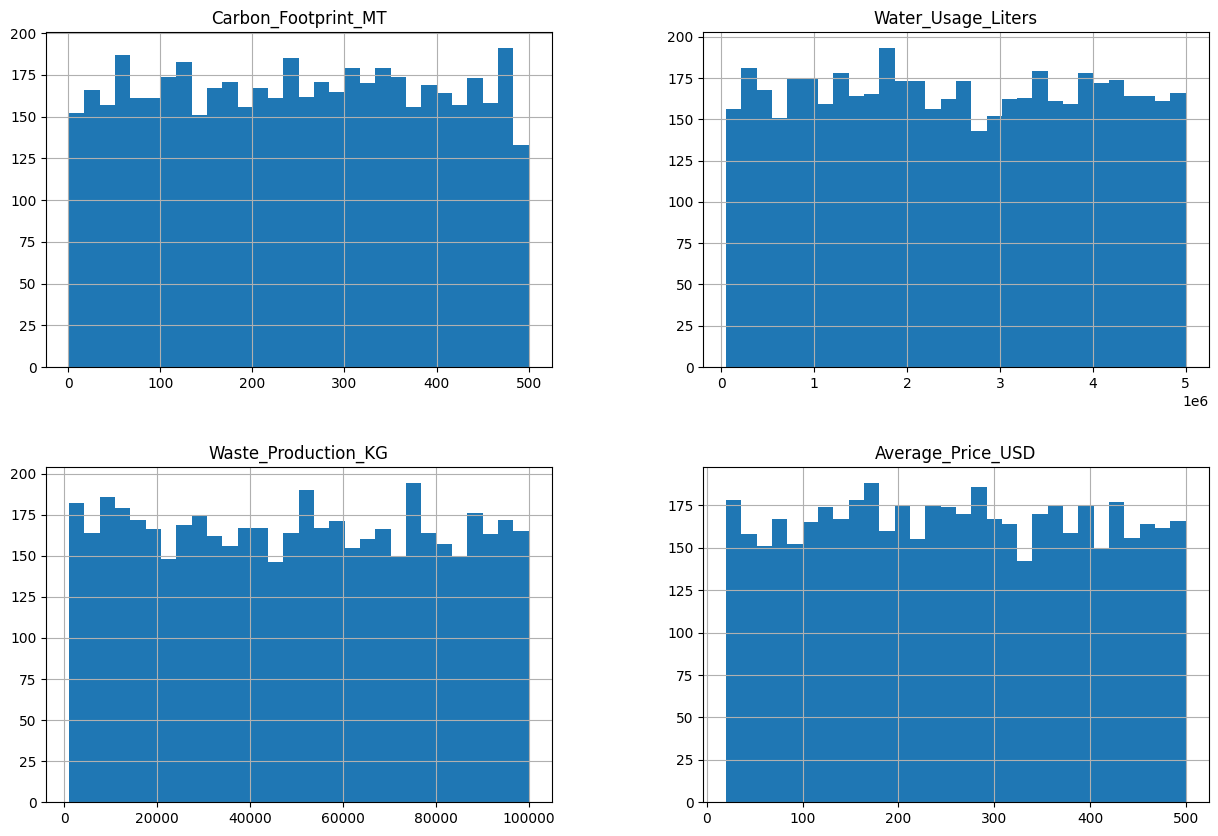

In [7]:
df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Average_Price_USD']].hist(figsize=(15, 10), bins=30)
plt.show()


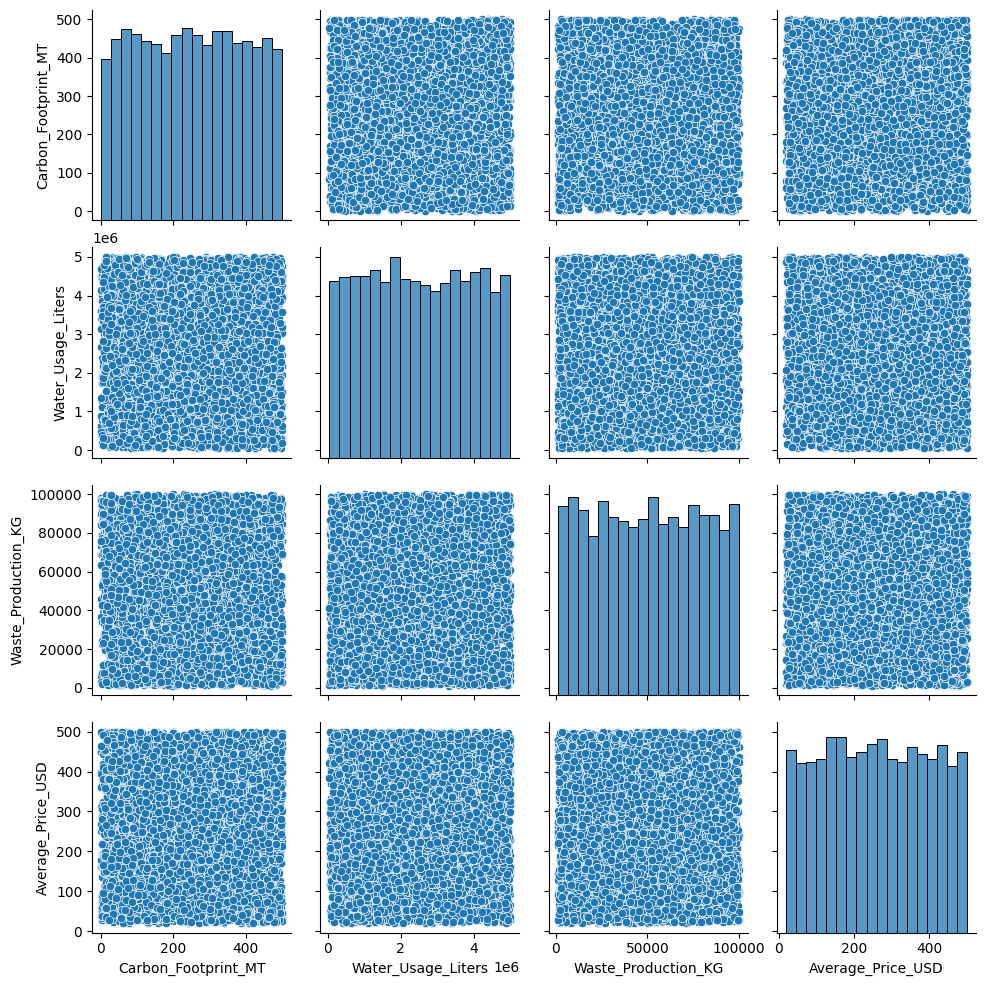

In [8]:
sns.pairplot(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Average_Price_USD', 'Sustainability_Rating']])
plt.show()


# **Categorical Features Analysis**

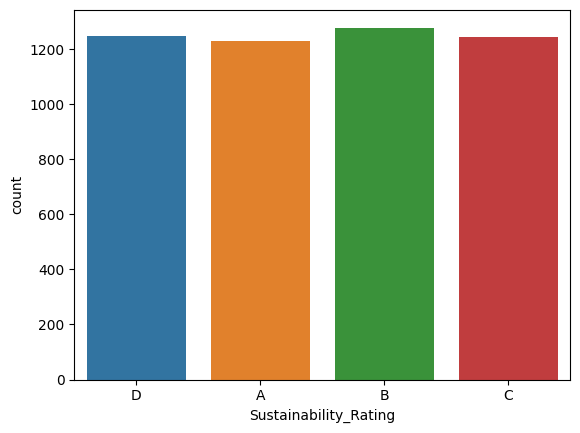

In [9]:
sns.countplot(data=df, x='Sustainability_Rating')
plt.show()


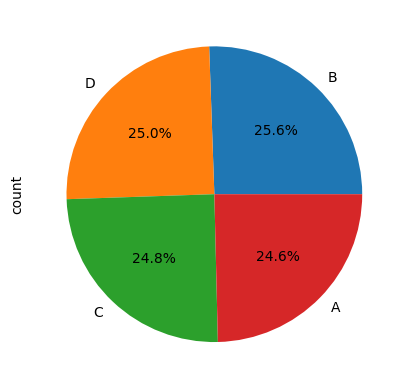

In [10]:
df['Sustainability_Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


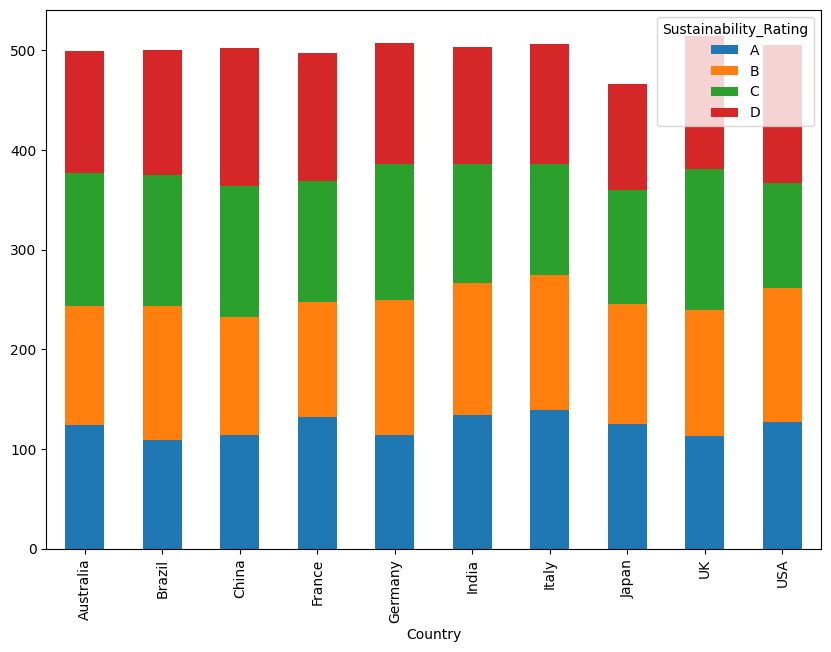

In [11]:
pd.crosstab(df['Country'], df['Sustainability_Rating']).plot.bar(stacked=True, figsize=(10, 7))
plt.show()


# **Temporal Analysis**

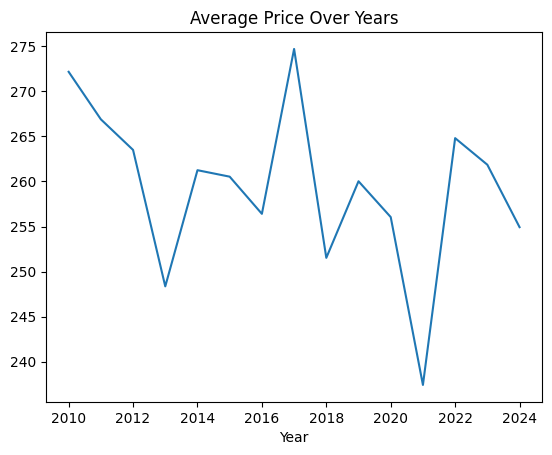

In [12]:
df.groupby('Year')['Average_Price_USD'].mean().plot.line()
plt.title('Average Price Over Years')
plt.show()


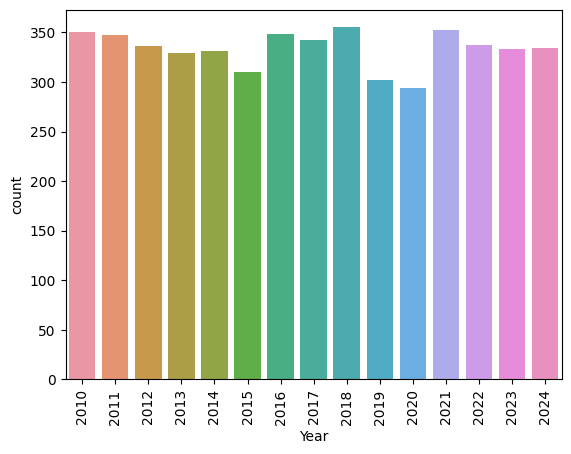

In [13]:
sns.countplot(data=df, x='Year')
plt.xticks(rotation=90)
plt.show()


# **Geographical Analysis**

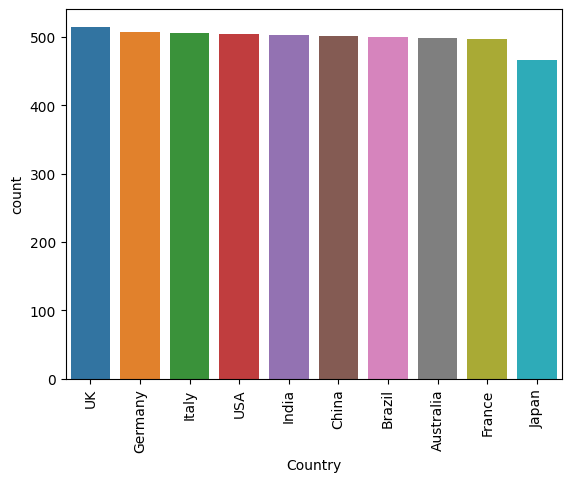

In [14]:
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


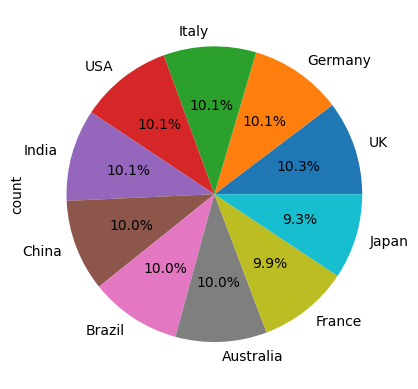

In [15]:
df['Country'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


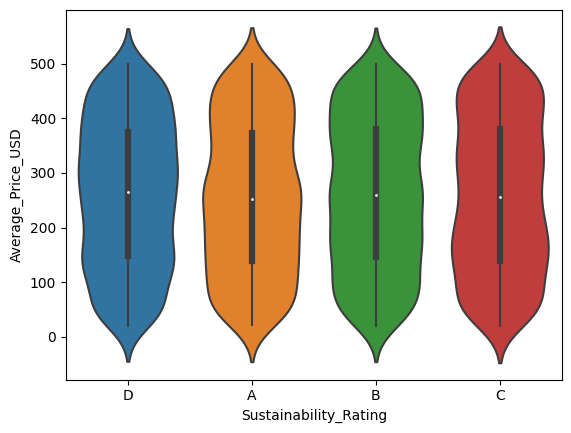

In [16]:
sns.violinplot(data=df, x='Sustainability_Rating', y='Average_Price_USD')
plt.show()


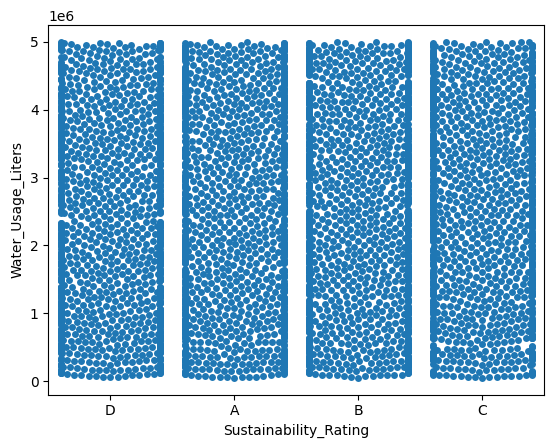

In [17]:
sns.swarmplot(data=df, x='Sustainability_Rating', y='Water_Usage_Liters')
plt.show()


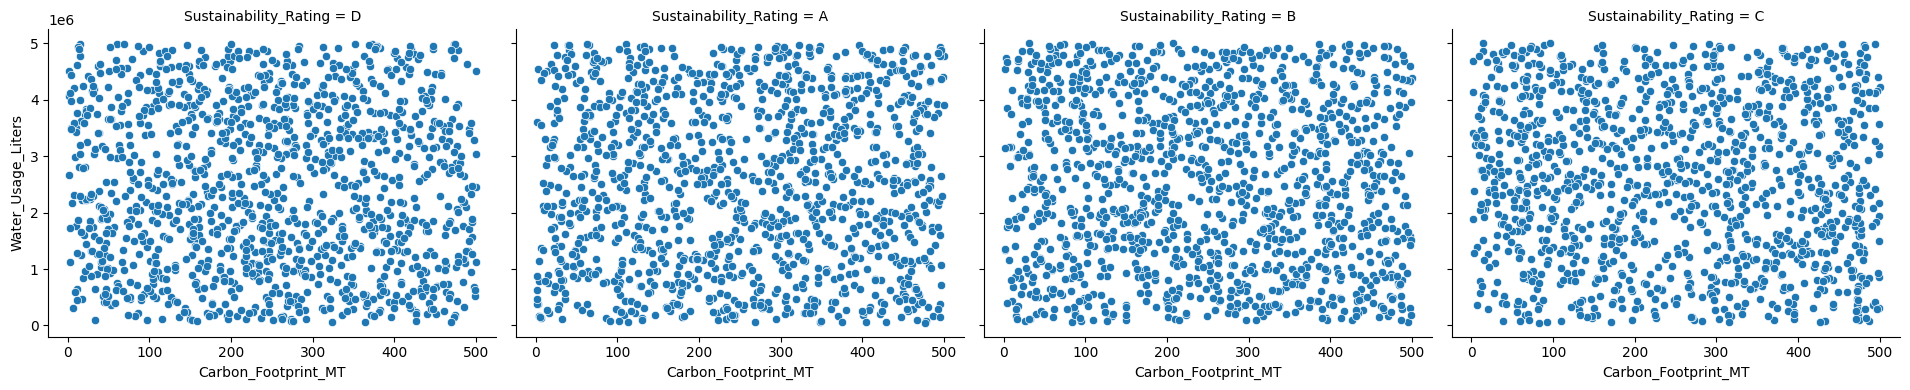

In [18]:
g = sns.FacetGrid(df, col='Sustainability_Rating', height=4, aspect=1.2)
g.map(sns.scatterplot, 'Carbon_Footprint_MT', 'Water_Usage_Liters')
plt.show()


# **Distribution Analysis**

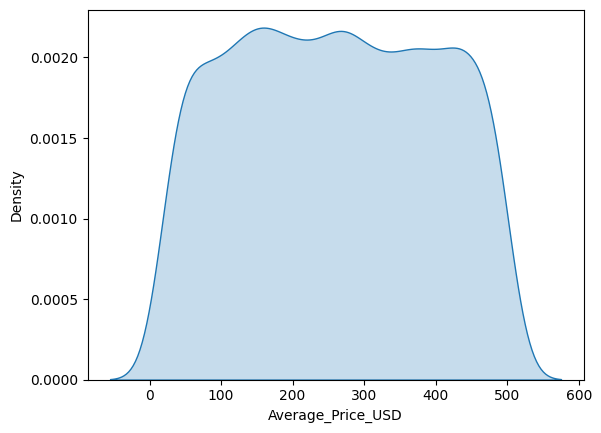

In [19]:
sns.kdeplot(df['Average_Price_USD'], shade=True)
plt.show()


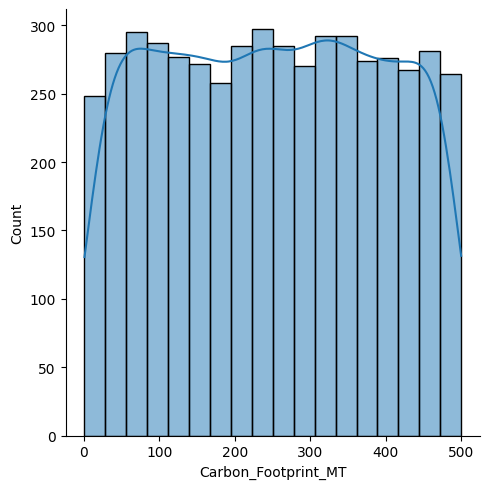

In [20]:
sns.displot(df['Carbon_Footprint_MT'], kde=True)
plt.show()


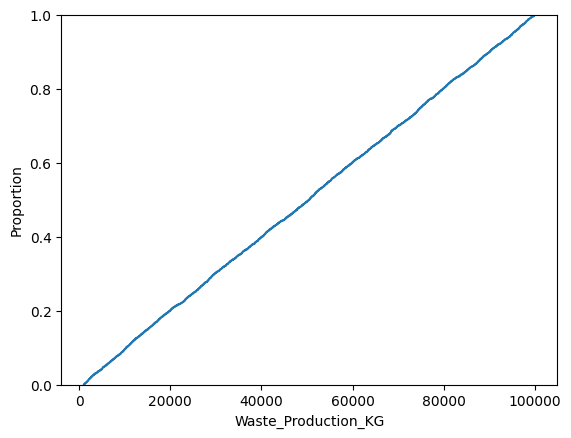

In [21]:
sns.ecdfplot(df['Waste_Production_KG'])
plt.show()


# **Comparison Plots**

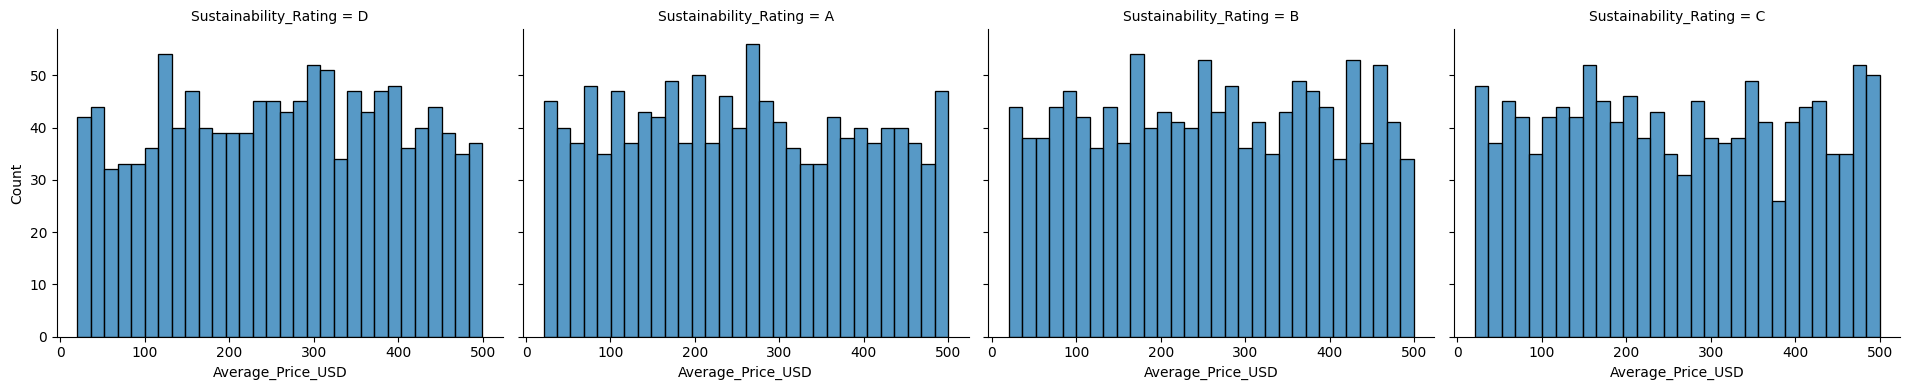

In [22]:
g = sns.FacetGrid(df, col='Sustainability_Rating', height=4, aspect=1.2)
g.map(sns.histplot, 'Average_Price_USD', bins=30)
plt.show()


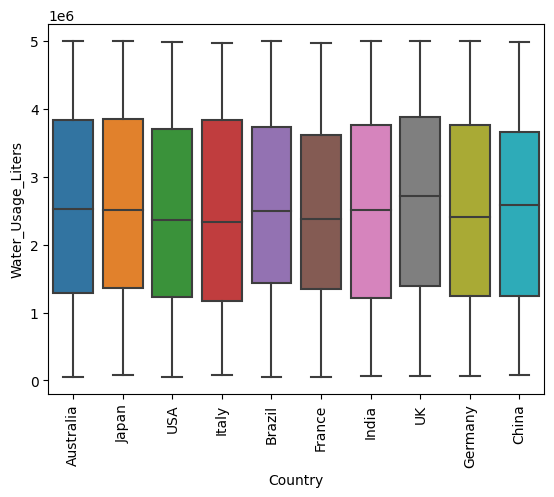

In [23]:
sns.boxplot(data=df, x='Country', y='Water_Usage_Liters')
plt.xticks(rotation=90)
plt.show()


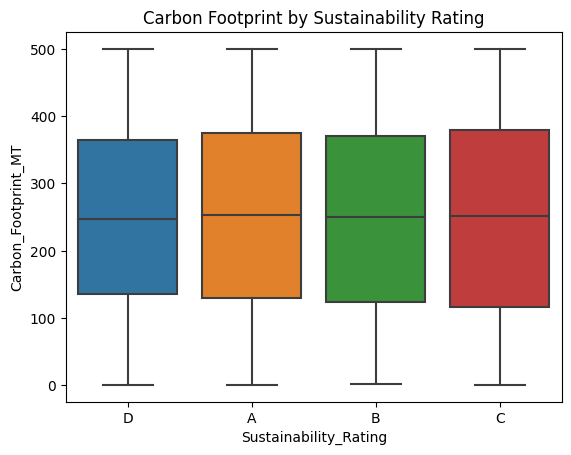

In [24]:
sns.boxplot(data=df, x='Sustainability_Rating', y='Carbon_Footprint_MT')
plt.title('Carbon Footprint by Sustainability Rating')
plt.show()


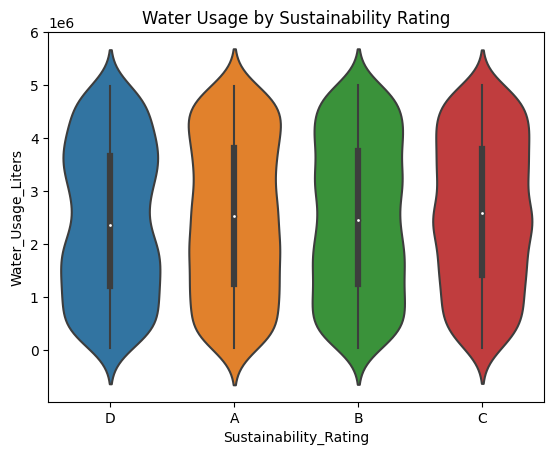

In [25]:
sns.violinplot(data=df, x='Sustainability_Rating', y='Water_Usage_Liters')
plt.title('Water Usage by Sustainability Rating')
plt.show()


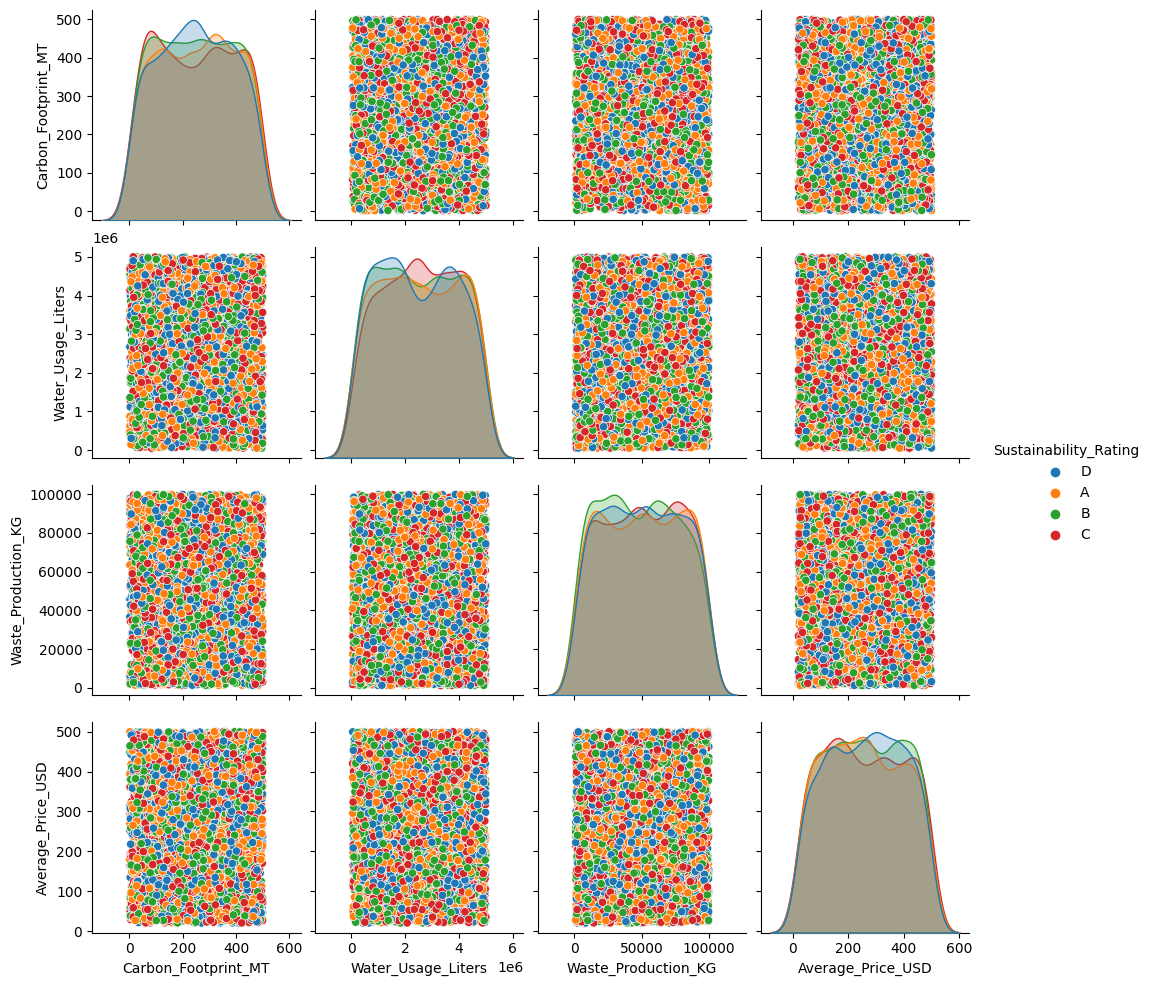

In [26]:
sns.pairplot(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Average_Price_USD', 'Sustainability_Rating']], hue='Sustainability_Rating')
plt.show()


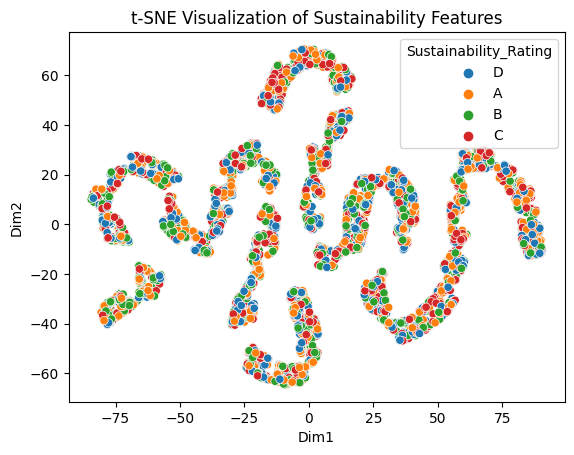

In [27]:
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df[['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Average_Price_USD']])
df_tsne = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2'])
df_tsne['Sustainability_Rating'] = df['Sustainability_Rating']

sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Sustainability_Rating')
plt.title('t-SNE Visualization of Sustainability Features')
plt.show()
